In [1]:
# conda: xesmfTools
# xarray OpenDap example
# adapted from: http://xarray.pydata.org/en/stable/examples/ROMS_ocean_model.html

# Partially works

import xarray as xr
import numpy as np

In [2]:
ds = xr.open_dataset('http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg', chunks={'ocean_time': 1})

In [3]:
if ds.Vtransform == 1:
    Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
    z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
elif ds.Vtransform == 2:
    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
    z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho

ds.coords['z_rho'] = z_rho.transpose()   # needing transpose seems to be an xarray bug
ds.salt

<xarray.DataArray 'salt' (ocean_time: 236664, s_rho: 30, eta_rho: 191, xi_rho: 671)>
dask.array<open_dataset-dbc46e2d78cba9153e313417f3451277salt, shape=(236664, 30, 191, 671), dtype=float32, chunksize=(1, 30, 191, 671), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (xi_rho, eta_rho) float64 dask.array<chunksize=(671, 191), meta=np.ndarray>
    lat_rho     (xi_rho, eta_rho) float64 dask.array<chunksize=(671, 191), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-01T01:00:00 ... 2020-01-01
    z_rho       (s_rho, xi_rho, eta_rho, ocean_time) float64 dask.array<chunksize=(30, 671, 191, 1), meta=np.ndarray>
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

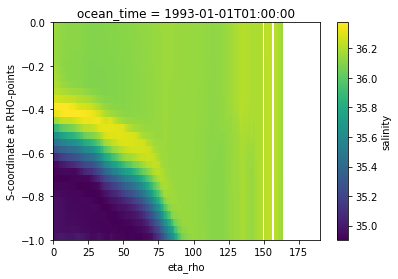

In [4]:
ds.salt.isel(xi_rho=50, ocean_time=0).plot()

In [17]:
section = ds.salt.isel(xi_rho=50, eta_rho=slice(0, 167), ocean_time=0)
section

<xarray.DataArray 'salt' (s_rho: 30, eta_rho: 167)>
dask.array<getitem, shape=(30, 167), dtype=float32, chunksize=(30, 167), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    lon_rho     (eta_rho) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    lat_rho     (eta_rho) float64 dask.array<chunksize=(167,), meta=np.ndarray>
    ocean_time  datetime64[ns] 1993-01-01T01:00:00
    z_rho       (s_rho, eta_rho) float64 dask.array<chunksize=(30, 167), meta=np.ndarray>
Dimensions without coordinates: eta_rho
Attributes:
    long_name:    salinity
    time:         ocean_time
    field:        salinity, scalar, series
    _ChunkSizes:  [  1  15  96 336]

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

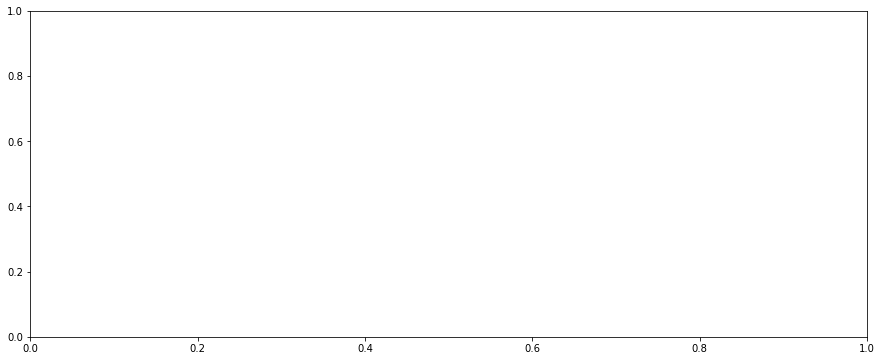

In [6]:
section.plot(x='lon_rho', y='z_rho', figsize=(15, 6), clim=(25, 35))
plt.ylim([-100, 1])

In [ ]:
proj = ccrs.LambertConformal(central_longitude=-92, central_latitude=29)
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=proj)
ds.salt.isel(s_rho=-1, ocean_time=0).plot(x='lon_rho', y='lat_rho',
                                          transform=ccrs.PlateCarree())

coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_10m)